In [25]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import time
print('all libraries imported')

all libraries imported


In [26]:
st = time.time()

In [27]:
#reading dataset into dataframe
df_iris = pd.read_csv('IRIS.csv')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
df_iris.shape

(150, 5)

In [29]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

The dataset does not contain any null value and they are in the proper datatypes, so we will go to exploratory analysis


Text(0.5, 1.0, 'Species distribution')

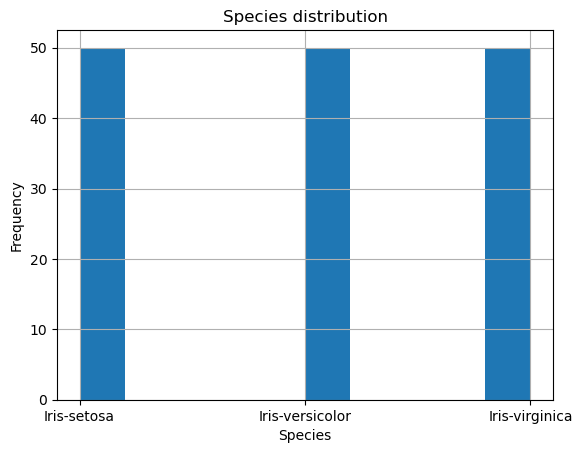

In [32]:
#plotting a histogram to visualize the species

viz = df_iris['species'].hist()
viz.set_xlabel('Species')
viz.set_ylabel('Frequency')
viz.set_title('Species distribution')

We can see from the histogram that the three species have the same frequency in the dataset

In [33]:
#to encode the species to be in numerical form for model training
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_iris['species'] = le.fit_transform(df_iris['species'])

Setosa specie = 0,
Versicolor specie = 1,
Virginica specie = 2

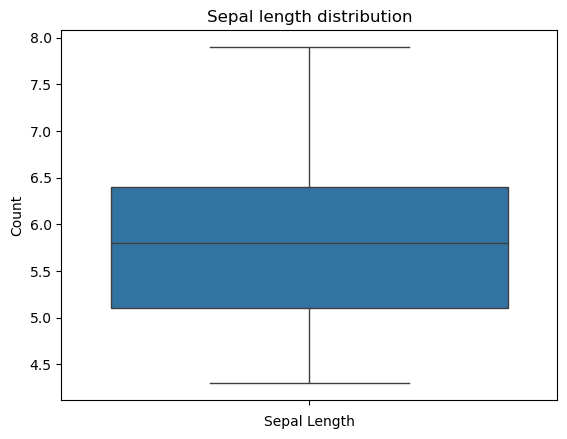

In [34]:
#to check for outliers in septal length
sns.boxplot(df_iris['sepal_length'])
plt.xlabel('Sepal Length')
plt.ylabel('Count')
plt.title('Sepal length distribution')
plt.show()

No outlier detected in the length of sepal

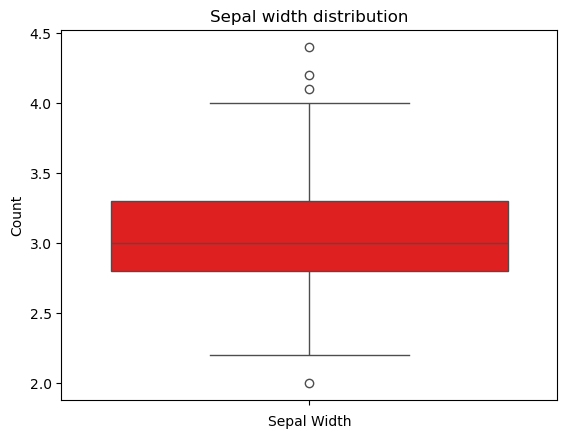

In [35]:
#to check for outliers in sepal width
sns.boxplot(df_iris['sepal_width'], color='red')
plt.xlabel('Sepal Width')
plt.ylabel('Count')
plt.title('Sepal width distribution')
plt.show()

Outliers detected in sepal_width values

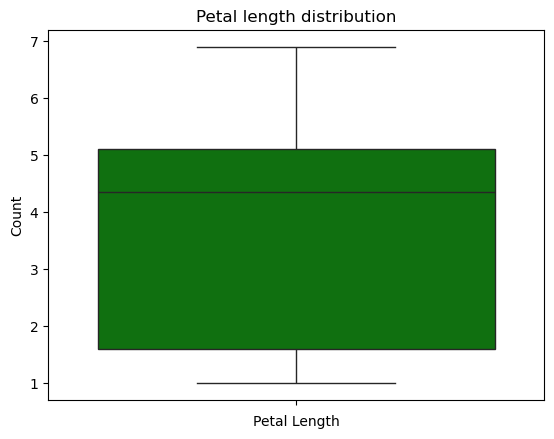

In [36]:
#to check for outliers in petal length
sns.boxplot(df_iris['petal_length'], color='Green')
plt.xlabel('Petal Length')
plt.ylabel('Count')
plt.title('Petal length distribution')
plt.show()

No outliers detected in petal_length values

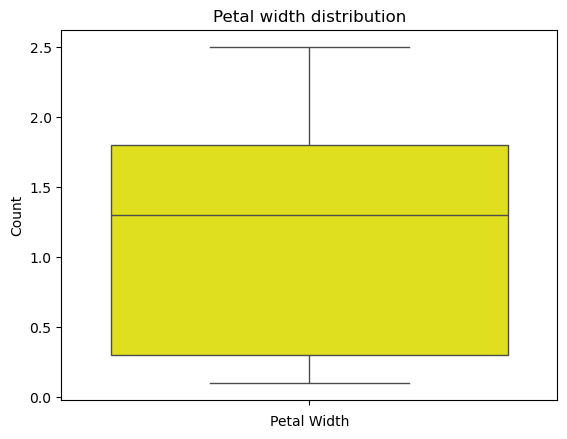

In [37]:
#to check for outliers in petal width
sns.boxplot(df_iris['petal_width'], color='yellow')
plt.xlabel('Petal Width')
plt.ylabel('Count')
plt.title('Petal width distribution')
plt.show()

No outliers detected in petal width

<Axes: >

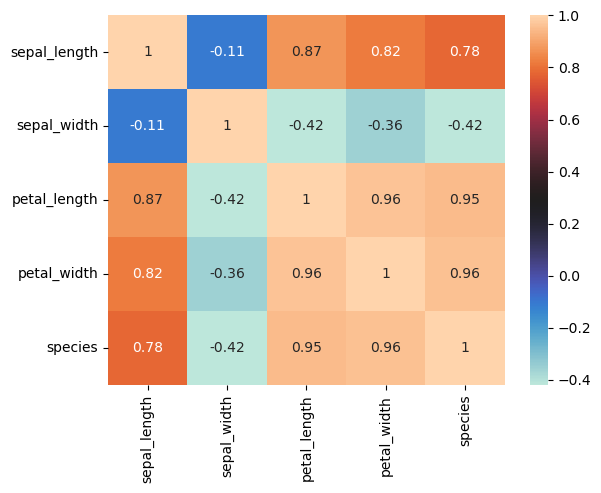

In [38]:
#to see the correlation between coluumns
corr = df_iris.corr()
sns.heatmap(corr, annot=True, cmap='icefire')

From the visualization, petal width is more correlerated to the specie


In [39]:
#splitting the dataframe into features and target
x = df_iris.drop('species', axis=1)
y = df_iris['species']


In [40]:
#importing all models to determine which to use based on accuracy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
print('all scikit library imported')

all scikit library imported


In [41]:
#listing all the models
models = [LogisticRegression(max_iter=1500), DecisionTreeClassifier(),SVC(kernel='linear'),SVC(kernel='poly'),SVC(kernel='rbf'),SVC(kernel='sigmoid'), KNeighborsClassifier(),RandomForestClassifier(random_state=0),GradientBoostingClassifier()]
#iterating through the models to compare their accuracies in order to select the most accurate one
for model in models:
    cv_score = cross_val_score(model, x, y, cv= 5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    percentage_mean_accuracy = round(mean_accuracy*100, 2)
    print('The accuracy of ', model, ' is ', percentage_mean_accuracy, '%')
    print('..............................................................')

The accuracy of  LogisticRegression(max_iter=1500)  is  97.33 %
..............................................................
The accuracy of  DecisionTreeClassifier()  is  96.0 %
..............................................................
The accuracy of  SVC(kernel='linear')  is  98.0 %
..............................................................
The accuracy of  SVC(kernel='poly')  is  98.0 %
..............................................................
The accuracy of  SVC()  is  96.67 %
..............................................................
The accuracy of  SVC(kernel='sigmoid')  is  6.67 %
..............................................................
The accuracy of  KNeighborsClassifier()  is  97.33 %
..............................................................
The accuracy of  RandomForestClassifier(random_state=0)  is  96.67 %
..............................................................
The accuracy of  GradientBoostingClassifier()  is  96.0 %
.............

From the output, i will go with KNeighborsClassifier because of its simplicity and almost 100% accuracy

In [42]:
#splitting the dataset into test and train dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [43]:
#training the model
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [44]:
#importing metrics
from sklearn import metrics
print('Mean absolute:', round(metrics.mean_absolute_error(y_test, y_pred), 2))
print('Mean squared error:', round(metrics.mean_squared_error(y_test, y_pred), 2))
print('Root mean squared error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))
print('The accuracy score: ',round(metrics.accuracy_score(y_pred, y_test)*100, 2),  '%')

Mean absolute: 0.03
Mean squared error: 0.03
Root mean squared error: 0.18
The accuracy score:  96.67 %


In [45]:
et = time.time()
elp = round(et - st, 2)
print('elapsed time for the process is', round(elp, 2), 's')

elapsed time for the process is 19.4 s


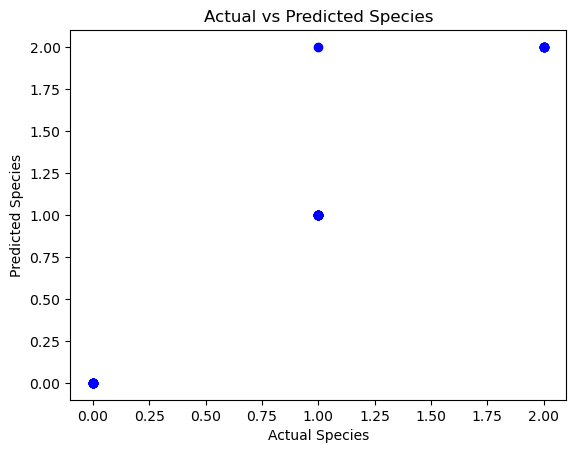

In [46]:
#plotting a line plot to display predicted value vs actual value
plt.plot(y_test, y_pred, 'o', color='blue')
plt.xlabel('Actual Species')
plt.ylabel('Predicted Species')
plt.title('Actual vs Predicted Species')
plt.show()

In [47]:
#testing our model
input_data = [6.7, 3.1, 4.4, 1.4]
input_data_array = np.asarray(input_data)
input_data_reshape = input_data_array.reshape(1, -1)
prediction = model.predict(input_data_reshape)
if prediction == 0:
    print('The predicted species is Setosa')
elif prediction == 1:
    print('The predicted species is Versicolor')
else:
    print('The predicted species is Virginica')

The predicted species is Versicolor


c:\Users\MY PC\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
